# Debugging code

This notebook serves as  testbed for the code written in the separate python files. Here I test the different functions with their inputs and use possible error messages to debug. 

In [1]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# import code
from plotting import plotting
from solvers import solver

In [2]:
# initialize necessary classes

mu = 1.0 # set to 1 for convenience
T = 1.0 # set to 1 for convenience

# Riemann initial conditions
rho_L = 1.0  # x < 0
rho_R = 0.5  # x > 0

plots = plotting(rho_L, rho_R, T=T, mu=mu)

## Plotting class
Here I will test the different plotting functionality I have added to this class.

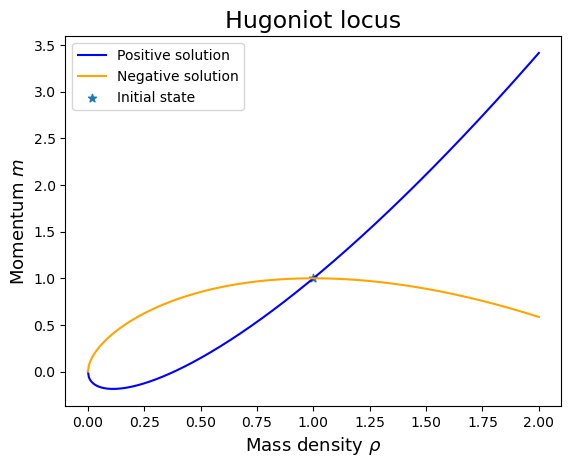

In [3]:
# we plot the Hugoniot locus for a given state U
U = (1, 1)
plots.plot_Hugoniot_locus(U)

In [ ]:
# 

## solver class
This part is dedicated to testing the different solvers implemented. 

## First try solution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
c_s = 1.0  # Isothermal sound speed

# Function to calculate Hugoniot loci for a given state U (rho, v)
def compute_hugoniot_loci(rho_0, v_0, rho_range):
    loci = []
    for rho in rho_range:
        if rho != rho_0:
            delta_rho = rho - rho_0
            v_shock = v_0 + c_s * np.sqrt(delta_rho / rho_0) * (1 if delta_rho > 0 else -1)
            loci.append((rho, v_shock))
    return np.array(loci)

# Function to compute integral curves (rarefactions) for a given state U (rho, v)
def compute_integral_curves(rho_0, v_0, rho_range, wave_type):
    curves = []
    for rho in rho_range:
        if wave_type == '1-rarefaction':
            v = v_0 - c_s * np.log(rho / rho_0)
        elif wave_type == '2-rarefaction':
            v = v_0 + c_s * np.log(rho / rho_0)
        else:
            raise ValueError("Invalid wave type. Choose '1-rarefaction' or '2-rarefaction'.")
        curves.append((rho, v))
    return np.array(curves)

# Function to solve the Riemann problem and find intermediate state U*
def solve_riemann_problem(rho_L, v_L, rho_R, v_R):
    # Initialize guesses for the intermediate state
    rho_star = (rho_L + rho_R) / 2
    v_star = (v_L + v_R) / 2

    # Solve iteratively using conservation laws (not implemented in detail for simplicity)
    # Use Hugoniot loci and integral curves to refine estimates of rho_star and v_star
    # For this template, we return approximate values for demonstration purposes
    return rho_star, v_star

# Plot Hugoniot loci and integral curves
def plot_state_space(rho_L, v_L, rho_R, v_R):
    rho_range = np.linspace(0.1, 2.0, 500)

    # Compute loci and curves for left state
    hugoniot_L = compute_hugoniot_loci(rho_L, v_L, rho_range)
    rarefaction_1_L = compute_integral_curves(rho_L, v_L, rho_range, '1-rarefaction')

    # Compute loci and curves for right state
    hugoniot_R = compute_hugoniot_loci(rho_R, v_R, rho_range)
    rarefaction_2_R = compute_integral_curves(rho_R, v_R, rho_range, '2-rarefaction')

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot Hugoniot loci
    plt.plot(hugoniot_L[:, 0], hugoniot_L[:, 1], label='Hugoniot Loci (Left)', linestyle='--')
    plt.plot(hugoniot_R[:, 0], hugoniot_R[:, 1], label='Hugoniot Loci (Right)', linestyle='--')

    # Plot Integral Curves
    plt.plot(rarefaction_1_L[:, 0], rarefaction_1_L[:, 1], label='1-Rarefaction (Left)', linestyle=':')
    plt.plot(rarefaction_2_R[:, 0], rarefaction_2_R[:, 1], label='2-Rarefaction (Right)', linestyle=':')

    # Plot initial states
    plt.scatter([rho_L, rho_R], [v_L, v_R], color='red', label='Initial States')

    # Add labels and legend
    plt.xlabel('Density (rho)')
    plt.ylabel('Velocity (v)')
    plt.title('State Space: Hugoniot Loci and Integral Curves')
    plt.legend()
    plt.grid()
    plt.show()

# Main script to demonstrate the solution
if __name__ == "__main__":
    # Define left and right states (rho, v)
    rho_L, v_L = 1.0, 0.5
    rho_R, v_R = 0.5, -0.5

    # Solve Riemann problem
    rho_star, v_star = solve_riemann_problem(rho_L, v_L, rho_R, v_R)
    print(f"Intermediate State: rho* = {rho_star}, v* = {v_star}")

    # Plot state space
    plot_state_space(rho_L, v_L, rho_R, v_R)
